# Main code

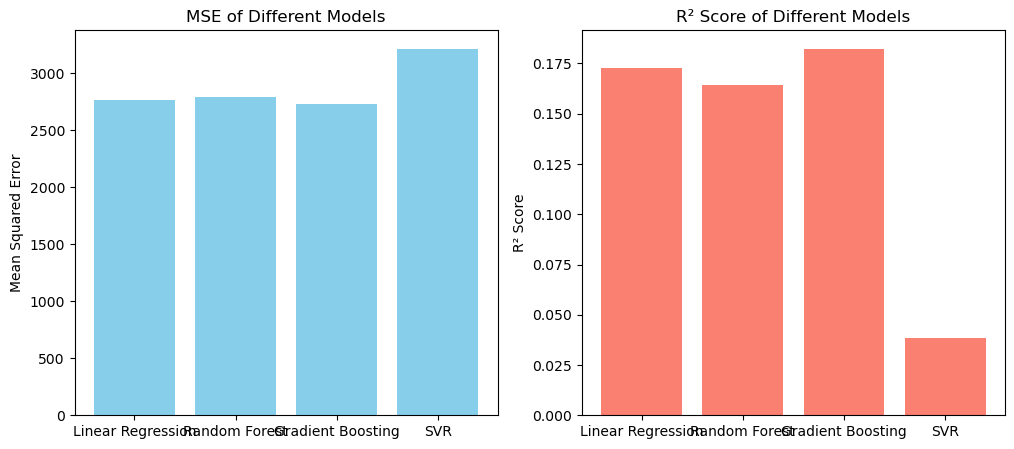

C:\Users\lenovo slim 3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


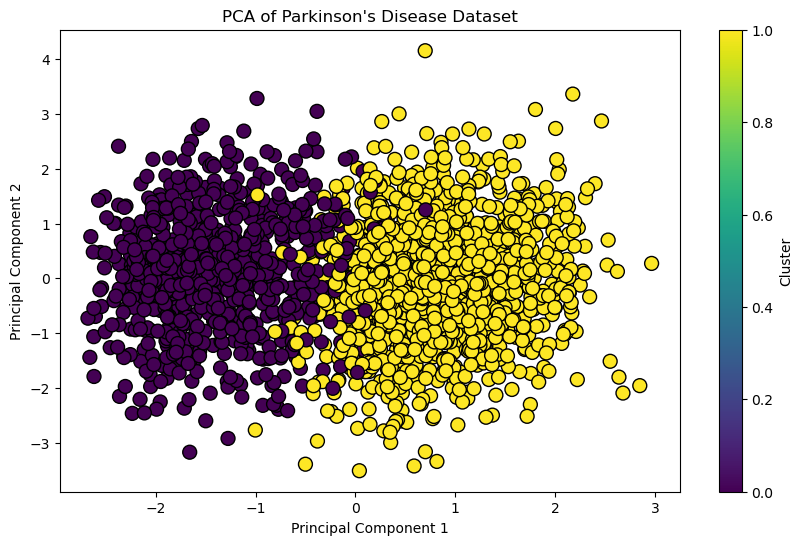

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv(r'C:\Users\lenovo slim 3\Desktop\Dissertation\parkinsons_disease_data.csv')

# Identify categorical and numerical columns
categorical_cols = ['DoctorInCharge']
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('UPDRS')

# Preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Define a pipeline for each regressor
pipelines = {
    'Linear Regression': Pipeline([('preprocessor', preprocessor), ('regressor', LinearRegression())]),
    'Random Forest': Pipeline([('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state=42))]),
    'Gradient Boosting': Pipeline([('preprocessor', preprocessor), ('regressor', GradientBoostingRegressor(random_state=42))]),
    'SVR': Pipeline([('preprocessor', preprocessor), ('regressor', SVR())])
}

# Prepare training and testing data
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['UPDRS']), df['UPDRS'], test_size=0.2, random_state=42)

# Fit, predict and calculate metrics
results = {}
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = (mse, r2)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
models = results.keys()
mse_scores = [result[0] for result in results.values()]
r2_scores = [result[1] for result in results.values()]

ax1.bar(models, mse_scores, color='skyblue')
ax1.set_title('MSE of Different Models')
ax1.set_ylabel('Mean Squared Error')

ax2.bar(models, r2_scores, color='salmon')
ax2.set_title('R² Score of Different Models')
ax2.set_ylabel('R² Score')

plt.show()

# K-Means Clustering and PCA Analysis after preprocessing
X_preprocessed = preprocessor.fit_transform(df.drop(columns=['UPDRS']))
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_preprocessed)
df['cluster'] = kmeans.labels_

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Parkinson\'s Disease Dataset')
plt.colorbar(label='Cluster')
plt.show()


<Figure size 640x480 with 0 Axes>

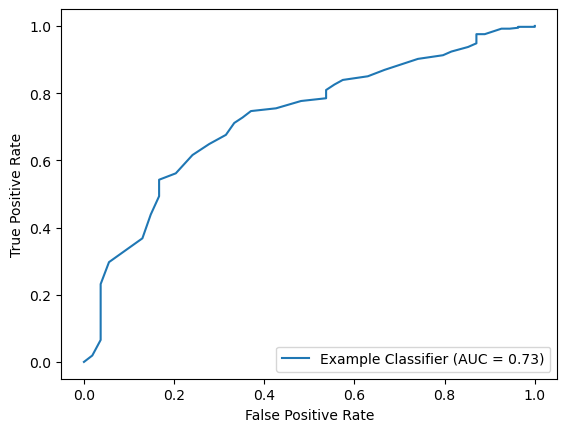

In [38]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier  # Example classifier

# Example threshold and binary conversion
threshold = 25  # Define according to your clinical relevance
y_binary = (y > threshold).astype(int)
y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

# Fit a binary classifier
classifier = RandomForestClassifier(random_state=42)
pipeline = Pipeline([('preprocessor', preprocessor), ('classifier', classifier)])
pipeline.fit(X_train, y_train_binary)  # Train on binary targets

# Predict probabilities for the positive class
y_scores = pipeline.predict_proba(X_test)[:, 1]

# Generate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test_binary, y_scores)
roc_auc = auc(fpr, tpr)  # Calculate area under the curve

# Plot ROC curve
plt.figure()
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Example Classifier').plot()
plt.show()


Since you're dealing with a regression problem in your current setup, generating an ROC curve directly isn't applicable, as ROC curves are used for classification tasks. However, if you want to analyze the performance of a binary classification derived from your continuous output (e.g., high vs. low risk based on a UPDRS threshold), you first need to convert your regression problem into a binary classification problem.

Here's how you can modify your code to include a step for binary classification and subsequently plot an ROC curve if you decide to classify based on a certain UPDRS threshold:

Binarize your output based on a chosen threshold.
Add a classification model.
Plot the ROC Curve.

Note:
Choose your threshold carefully: The choice of threshold to convert continuous data into binary categories should be based on clinical insights or statistical analysis.
Classifier choice: I used a RandomForestClassifier as an example. You might choose another classifier depending on your analysis needs.
Re-evaluation needed: After modifying your target as binary, you should re-evaluate the appropriateness of your features, preprocessing steps, and the entire modeling pipeline.
This code integrates directly into your existing pipeline structure and assumes you are converting a continuous variable into a binary outcome for demonstration purposes. Make sure this conceptual transformation aligns with your analysis goals and data characteristics.

In [41]:
# Fit, predict, and store results including predictions
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = (mse, r2, y_pred)  # Store predictions as well


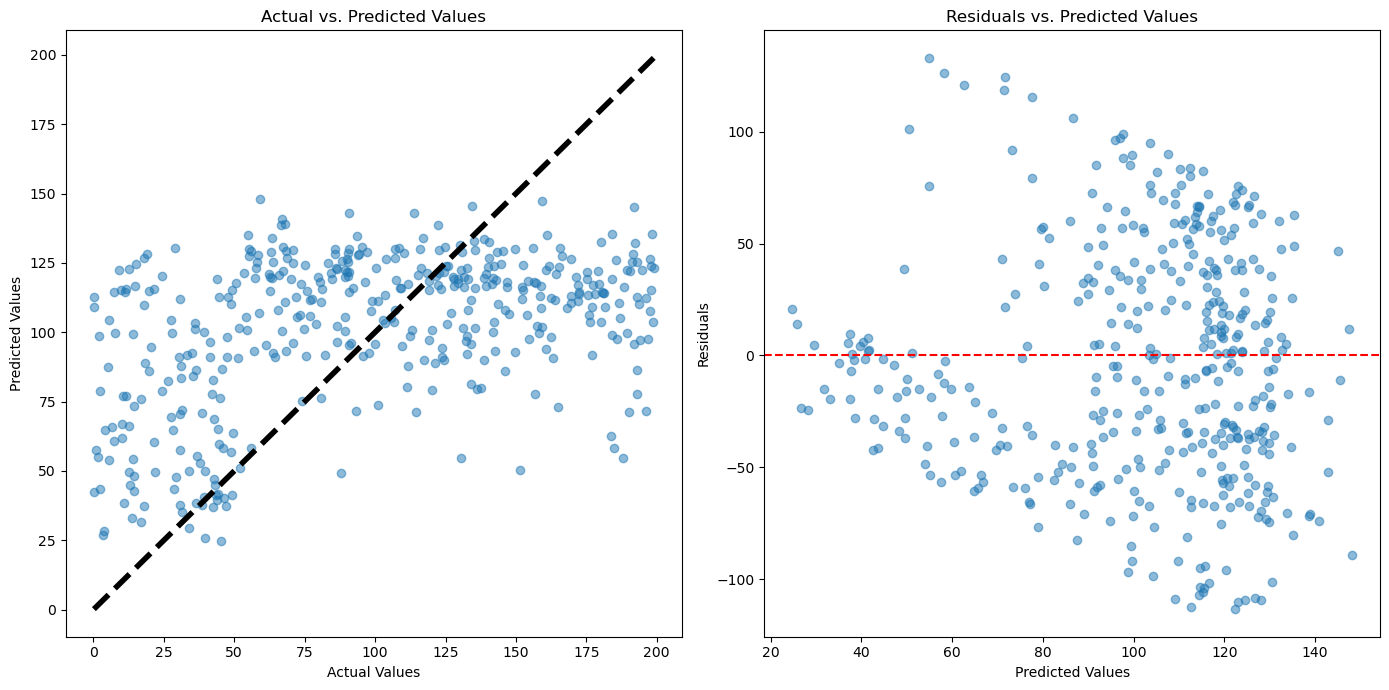

In [42]:
# Check if predictions are available for Gradient Boosting
if 'Gradient Boosting' in results and len(results['Gradient Boosting']) > 2:
    predictions = results['Gradient Boosting'][2]  # Assuming the third element is predictions

    # Scatter plot of Predictions vs Actuals
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, predictions, alpha=0.5)  # Use the stored predictions
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    # Residual Plot
    residuals = y_test - predictions
    plt.subplot(1, 2, 2)
    plt.scatter(predictions, residuals, alpha=0.5)
    plt.title('Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')

    plt.tight_layout()
    plt.show()
else:
    print("Predictions for 'Gradient Boosting' are not available.")


To implement the suggested improvements in your workflow, follow these steps:

1. Cross-Validation:
Implement cross-validation to better evaluate your model’s performance.

In [43]:
from sklearn.model_selection import cross_val_score

# Example with Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
cross_val_scores = cross_val_score(gb_model, X_preprocessed, y, cv=10, scoring='r2')
print(f"Mean R² Score from Cross-Validation: {cross_val_scores.mean()}")


Mean R² Score from Cross-Validation: 0.23127900032492615


2. Feature Engineering:
Use polynomial features to capture non-linear relationships.

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# First, identify the numerical columns (excluding categorical ones)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('UPDRS')

# Preprocessing pipeline for numerical columns only
poly_preprocessor = ColumnTransformer(
    transformers=[
        ('num', PolynomialFeatures(degree=2), numerical_cols),
        # You can add other preprocessing steps for categorical columns if needed
    ])

# Create a pipeline for the Gradient Boosting model
pipeline = Pipeline([
    ('poly_features', poly_preprocessor),
    ('scaler', StandardScaler()),  # Scale the features after polynomial expansion
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Fit the model with polynomial features
pipeline.fit(X_train, y_train)

# Make predictions
y_pred_gb_poly = pipeline.predict(X_test)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_gb_poly)
r2_poly = r2_score(y_test, y_pred_gb_poly)
print(f"Polynomial Gradient Boosting MSE: {mse_poly}, R²: {r2_poly}")


Polynomial Gradient Boosting MSE: 2796.3218156109474, R²: 0.1638125200880184


3. Hyperparameter Tuning:
Use Grid Search to find the best hyperparameters.

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

# Identify categorical and numerical columns
categorical_cols = ['DoctorInCharge']
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('UPDRS')

# Preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Define a pipeline for Gradient Boosting with preprocessing
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Define parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__max_depth': [3, 4, 5]
}

# Grid search with Gradient Boosting
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best estimator
best_gb_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_gb_best = best_gb_model.predict(X_test)
print("Best Gradient Boosting MSE:", mean_squared_error(y_test, y_pred_gb_best))
print("Best Gradient Boosting R² Score:", r2_score(y_test, y_pred_gb_best))


Best Gradient Boosting MSE: 2639.569074105334
Best Gradient Boosting R² Score: 0.21068648114540667


5. Regularization:
Implement Lasso or Ridge regularization to reduce overfitting.

In [49]:
from sklearn.linear_model import Ridge

ridge_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Regression R² Score:", r2_score(y_test, y_pred_ridge))


Ridge Regression MSE: 2766.9564269526
Ridge Regression R² Score: 0.17259368762094573


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv(r'C:\Users\lenovo slim 3\Desktop\Dissertation\parkinsons_disease_data.csv')

# Identify categorical and numerical columns
categorical_cols = ['DoctorInCharge']
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('UPDRS')

# Preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Define a pipeline for Gradient Boosting with hyperparameter tuning
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__max_depth': [3, 4, 5]
}

# GridSearchCV for Gradient Boosting
grid_search = GridSearchCV(gb_pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best Gradient Boosting model after hyperparameter tuning
best_gb_model = grid_search.best_estimator_

# Evaluate the tuned Gradient Boosting model
y_pred_gb_best = best_gb_model.predict(X_test)
print("Best Gradient Boosting MSE:", mean_squared_error(y_test, y_pred_gb_best))
print("Best Gradient Boosting R² Score:", r2_score(y_test, y_pred_gb_best))

# Add the tuned Gradient Boosting model to the results for comparison
results['Tuned Gradient Boosting'] = (mean_squared_error(y_test, y_pred_gb_best), r2_score(y_test, y_pred_gb_best))

# Visualization (including the tuned Gradient Boosting model)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
models = results.keys()
mse_scores = [result[0] for result in results.values()]
r2_scores = [result[1] for result in results.values()]

ax1.bar(models, mse_scores, color='skyblue')
ax1.set_title('MSE of Different Models')
ax1.set_ylabel('Mean Squared Error')

ax2.bar(models, r2_scores, color='salmon')
ax2.set_title('R² Score of Different Models')
ax2.set_ylabel('R² Score')

plt.show()

# K-Means Clustering and PCA Analysis after preprocessing
X_preprocessed = preprocessor.fit_transform(df.drop(columns=['UPDRS']))
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_preprocessed)
df['cluster'] = kmeans.labels_

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Parkinson\'s Disease Dataset')
plt.colorbar(label='Cluster')
plt.show()


NameError: name 'X_train' is not defined